# mosum.py: user guide

## Installation
`(.venv) $ pip install mosum`

## Generating data
We can simulate data from a mean-change model with `testdata`.
The simulated data is stored in `x`, and the signal in `mu`.

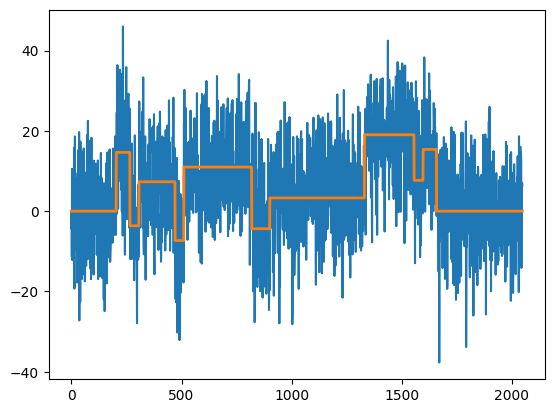

In [4]:
import mosum
sim = mosum.testData("blocks")
x = sim["x"]
from matplotlib import pyplot as plt
import pandas as pd
pd.Series(x).plot()
plt.plot(sim["mu"], '-', lw=2)
plt.show()

## MOSUM procedure

The function `mosum` uses a single bandwidth to detect changes.
This returns an object with `plot`, `print`, and `summary` methods.


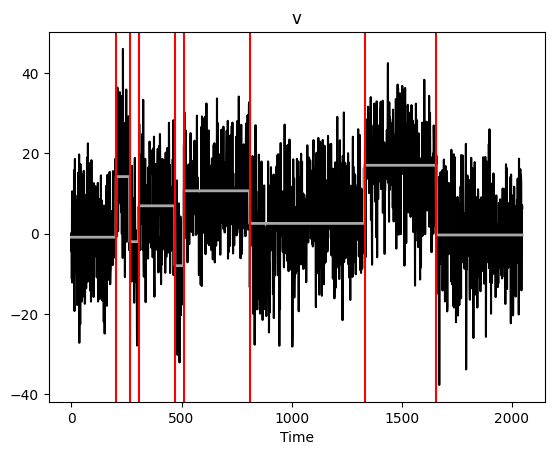

In [5]:
ms = mosum.mosum(x, G = 20)
ms.plot()
plt.show()

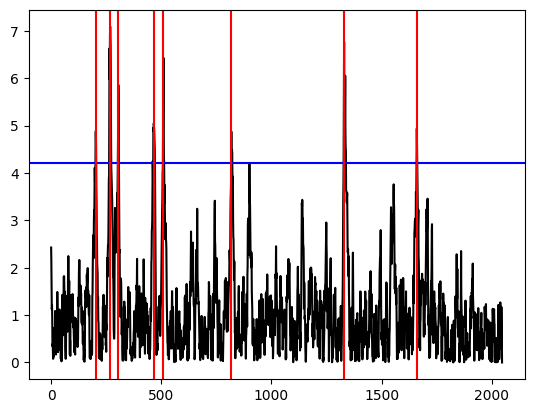

In [10]:
ms.plot(display="mosum")
plt.show()

In [11]:
ms.print()

change points detected with bandwidths (20,20) at alpha = 0.1 according to eta-criterion with eta = 0.4 and mosum variance estimate:
   cpts  G_left  G_right  p_value   jump
0   203      20       20    0.013  1.547
1   268      20       20    0.000  2.243
2   305      20       20    0.001  1.853
3   466      20       20    0.008  1.597
4   510      20       20    0.000  2.033
5   818      20       20    0.014  1.542
6  1330      20       20    0.000  2.140
7  1660      20       20    0.011  1.562


In [12]:
ms.summary()

change points detected at alpha = 0.1 according to eta-criterion with eta = 0.4 and mosum variance estimate:
   cpts  G_left  G_right  p_value   jump
0   203      20       20    0.013  1.547
1   268      20       20    0.000  2.243
2   305      20       20    0.001  1.853
3   466      20       20    0.008  1.597
4   510      20       20    0.000  2.033
5   818      20       20    0.014  1.542
6  1330      20       20    0.000  2.140
7  1660      20       20    0.011  1.562


## Multiscale MOSUM procedure with bottom-up merging

The function `multiscale_bottomUp` runs the MOSUM procedure with multiple bandwidths, merging these from smallest to largest.
Again, this returns an object with `plot`, `print`, and `summary` methods.


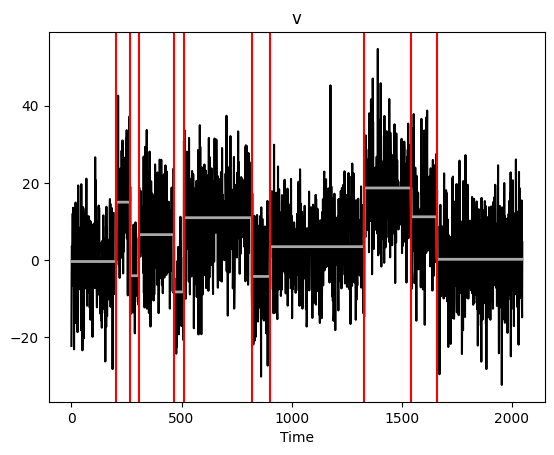

In [13]:
%%capture --no-display
ms_multi = mosum.multiscale_bottomUp(x, G = [10,20,40])
ms_multi.plot()
plt.show()

In [14]:
ms_multi.print()

change points detected with bandwidths ([10, 20, 40],[10, 20, 40]) at alpha = 0.1 according to eta-criterion with eta = 0.4 and mosum variance estimate:
     cpts  G_left  G_right  p_value   jump
0   268.0    10.0     10.0    0.005  2.365
1   306.0    10.0     10.0    0.039  2.087
2   466.0    10.0     10.0    0.007  2.331
3   818.0    10.0     10.0    0.051  2.051
4  1330.0    10.0     10.0    0.001  2.551
5   203.0    20.0     20.0    0.013  1.547
6   510.0    20.0     20.0    0.000  2.033
7  1660.0    20.0     20.0    0.011  1.562
8   903.0    40.0     40.0    0.015  1.059
9  1543.0    40.0     40.0    0.006  1.130


In [15]:
ms_multi.summary()

change points detected at alpha = 0.1 according to eta-criterion with eta = 0.4 and mosum variance estimate:
     cpts  G_left  G_right  p_value   jump
0   268.0    10.0     10.0    0.005  2.365
1   306.0    10.0     10.0    0.039  2.087
2   466.0    10.0     10.0    0.007  2.331
3   818.0    10.0     10.0    0.051  2.051
4  1330.0    10.0     10.0    0.001  2.551
5   203.0    20.0     20.0    0.013  1.547
6   510.0    20.0     20.0    0.000  2.033
7  1660.0    20.0     20.0    0.011  1.562
8   903.0    40.0     40.0    0.015  1.059
9  1543.0    40.0     40.0    0.006  1.130


## Multiscale MOSUM procedure with local pruning

The function `multiscale_localPrune` runs the MOSUM procedure with local pruning, removing change point candidates locally to optimise an information criterion.
Again, this returns an object with `plot`, `print`, and `summary` methods.

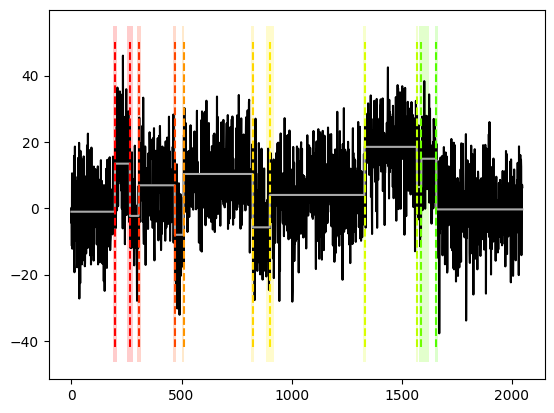

In [6]:
%%capture --no-display
ms_multi_lp = mosum.multiscale_localPrune(x, G = [10,20,40])
ms_multi_lp.plot()
plt.show()

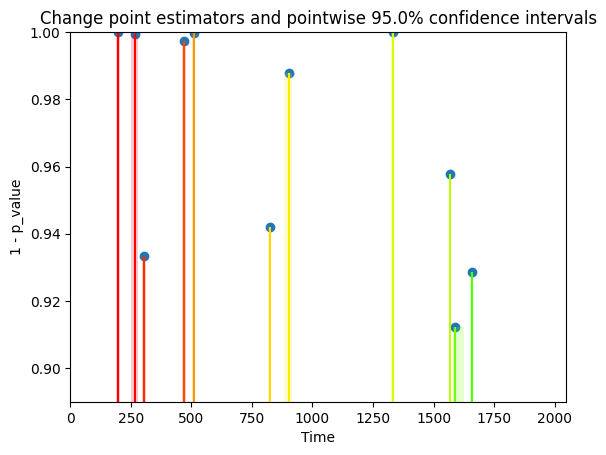

In [7]:
ms_multi_lp.plot(display = "significance")
plt.show()

In [18]:
ms_multi_lp.print()

change points detected with bandwidths ([10, 20, 40],[10, 20, 40]) at alpha = 0.1 according to eta-criterion with eta = 0.4 and mosum variance estimate:
   cpts  G_left  G_right  p_value   jump
0   203      10       20    0.056  1.733
1   268      10       10    0.005  2.365
2   306      10       10    0.039  2.087
3   466      10       10    0.007  2.331
4   510      10       20    0.001  2.267
5   818      10       10    0.051  2.051
6   903      40       10    0.062  1.561
7  1330      10       10    0.001  2.551
8  1555      40       20    0.024  1.261
9  1660      20       10    0.025  1.832


In [19]:
ms_multi_lp.summary()

change points detected at alpha = 0.1 according to eta-criterion with eta = 0.4 and mosum variance estimate:
   cpts  G_left  G_right  p_value   jump
0   203      10       20    0.056  1.733
1   268      10       10    0.005  2.365
2   306      10       10    0.039  2.087
3   466      10       10    0.007  2.331
4   510      10       20    0.001  2.267
5   818      10       10    0.051  2.051
6   903      40       10    0.062  1.561
7  1330      10       10    0.001  2.551
8  1555      40       20    0.024  1.261
9  1660      20       10    0.025  1.832


# Confidence intervals
To obtain confidence intervals, we can specify `do.confint = True` as an argument to the `mosum`, `multiscale_bottomUp` or `multiscale_localPrune` functions, or use the `confint` method for the resulting objects.

In [25]:
%%script echo
b1 = ms.confint()
b2 = ms_multi.confint()
b3 = ms_multi_lp.confint()

## 3D visualisation

We can visualise in 3D the MOSUM detector at a range of scales, with the heights and colours of the detector corresponding to the size.

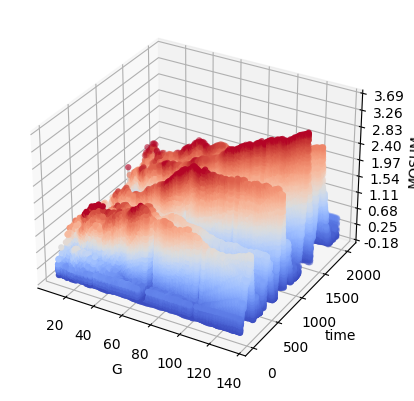

In [29]:
mosum.persp3D_multiscaleMosum(x)

## References

Eichinger, B., & Kirch, C. (2018). A MOSUM procedure for the estimation of multiple random change points. Bernoulli, 24(1), 526-564.

Messer, M., Albert, S., & Schneider, G. (2018). The multiple filter test for change point detection in time series. Metrika, 81, 589-607.

Meier, A., Kirch, C., & Cho, H. (2021). mosum: A package for moving sums in change-point analysis. Journal of Statistical Software, 97, 1-42.

Cho, H., & Kirch, C. (2022). Two-stage data segmentation permitting multiscale change points, heavy tails and dependence. Annals of the Institute of Statistical Mathematics, 1-32.

Cho, H., & Kirch, C. (2022). Bootstrap confidence intervals for multiple change points based on moving sum procedures. Computational Statistics & Data Analysis, 175, 107552.

